In [43]:
#Linear Regression packages
from sklearn.linear_model import LinearRegression

#Gradient Boosting packages
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

#Neural Network packages
from sklearn.neural_network import MLPRegressor

#Random Forest Regressor packages
from sklearn.ensemble import RandomForestRegressor

#Decision Tree packages
from sklearn.tree import DecisionTreeRegressor

#ML packages
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#Graphics packages
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

#Scientific computing and tables
import numpy as np
import pandas as pd

#Visualizations
import plotly
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.inspection import permutation_importance

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

#Versions
from platform import python_version
print(f"Python version: {python_version()}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")
print(f"Plotly version: {plotly.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"SciPy version: {sp.__version__}")

#Graph style
plt.style.use('default')

Python version: 3.12.4
scikit-learn version: 1.4.2
NumPy version: 1.26.4
pandas version: 2.2.2
Matplotlib version: 3.8.4
Plotly version: 5.22.0
seaborn version: 0.13.2
SciPy version: 1.13.1


In [44]:
# Loading the DataFrame file

df_original = pd.read_excel('principal_dataset.xlsx')

In [45]:
# Checking the first rows of the DataFrame

df_original.head()

,autor,sample_number,figure,medium_size_microparticle_(μm),microparticle_fraction_(wt%),coating_type,carrier_liquid_type,carrier_liquid_fraction_(wt%),carrier_liquid_viscosity_(cst),nanoparticle_type,medium_size_nanoparticle_(nm),nanoparticle_fraction_(wt%),SDS_fraction_(wt%),Stearic_acid_fraction_(wt%),fumed_silica_for_MRFs_fraction_(wt%),bentonite_fraction_(wt%),liquid_paraffin_fraction_(wt%),black_lead_fraction_(wt%),time_(h),sedimentation_rate_(%)
0,zhang2021,1,7a,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,1.49,7.58
1,zhang2021,1,7a,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,2.52,8.27
2,zhang2021,1,7a,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.45,3.15
3,zhang2021,1,7a,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.66,3.67
4,zhang2021,1,7a,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.89,4.24


In [46]:
# Deleting metadata

columns_delete = ['autor', 'sample_number', 'figure']
df_clean = df_original.drop(columns_delete, axis=1)

In [47]:
# Checking first rows of clean DataFrame

df_clean.head()

,medium_size_microparticle_(μm),microparticle_fraction_(wt%),coating_type,carrier_liquid_type,carrier_liquid_fraction_(wt%),carrier_liquid_viscosity_(cst),nanoparticle_type,medium_size_nanoparticle_(nm),nanoparticle_fraction_(wt%),SDS_fraction_(wt%),Stearic_acid_fraction_(wt%),fumed_silica_for_MRFs_fraction_(wt%),bentonite_fraction_(wt%),liquid_paraffin_fraction_(wt%),black_lead_fraction_(wt%),time_(h),sedimentation_rate_(%)
0,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,1.49,7.58
1,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,2.52,8.27
2,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.45,3.15
3,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.66,3.67
4,4.00,40.00,none,silicone oil,54,100,none,0,0,2,0,0.00,1,2,1,3.89,4.24


In [48]:
# Checking file information

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   medium_size_microparticle_(μm)        4898 non-null   float64
 1   microparticle_fraction_(wt%)          4898 non-null   float64
 2   coating_type                          4898 non-null   object 
 3   carrier_liquid_type                   4898 non-null   object 
 4   carrier_liquid_fraction_(wt%)         4898 non-null   int64  
 5   carrier_liquid_viscosity_(cst)        4898 non-null   int64  
 6   nanoparticle_type                     4898 non-null   object 
 7   medium_size_nanoparticle_(nm)         4898 non-null   int64  
 8   nanoparticle_fraction_(wt%)           4898 non-null   int64  
 9   SDS_fraction_(wt%)                    4898 non-null   int64  
 10  Stearic_acid_fraction_(wt%)           4898 non-null   int64  
 11  fumed_silica_for_

In [49]:
# Total unique values ​​for each variable

unique_values = []
for i in df_clean.columns[0:17].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    unique_values.append(len(df_clean[i].astype(str).value_counts()))

medium_size_microparticle_(μm) : 6
microparticle_fraction_(wt%) : 36
coating_type : 4
carrier_liquid_type : 2
carrier_liquid_fraction_(wt%) : 25
carrier_liquid_viscosity_(cst) : 4
nanoparticle_type : 3
medium_size_nanoparticle_(nm) : 2
nanoparticle_fraction_(wt%) : 3
SDS_fraction_(wt%) : 5
Stearic_acid_fraction_(wt%) : 5
fumed_silica_for_MRFs_fraction_(wt%) : 23
bentonite_fraction_(wt%) : 2
liquid_paraffin_fraction_(wt%) : 2
black_lead_fraction_(wt%) : 2
time_(h) : 3806
sedimentation_rate_(%) : 2954


In [50]:
# Checking file dimensions

df_clean.shape

(4898, 17)

In [51]:
# Selecting numeric columns only
df_numeric = df_clean.select_dtypes(include=['number'])

# Counting how many rows have at least one negative value
count_negative_lines = df_numeric.lt(0).any(axis=1).sum()

print(f"Total rows with negative values: {count_negative_lines}")

Total rows with negative values: 0


In [52]:
# Viewing some statistical measures

df_clean.describe()

,medium_size_microparticle_(μm),microparticle_fraction_(wt%),carrier_liquid_fraction_(wt%),carrier_liquid_viscosity_(cst),medium_size_nanoparticle_(nm),nanoparticle_fraction_(wt%),SDS_fraction_(wt%),Stearic_acid_fraction_(wt%),fumed_silica_for_MRFs_fraction_(wt%),bentonite_fraction_(wt%),liquid_paraffin_fraction_(wt%),black_lead_fraction_(wt%),time_(h),sedimentation_rate_(%)
count,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00,4898.00
mean,4.41,51.67,43.68,205.18,0.22,0.16,1.01,0.94,0.28,0.57,1.13,0.57,725.59,27.87
std,0.74,10.36,10.30,280.99,1.62,1.36,1.69,1.65,0.50,0.50,0.99,0.50,664.35,18.68
min,2.00,27.90,25.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00
25%,4.00,40.00,35.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,120.34,13.10
50%,4.00,50.00,41.00,100.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,1.00,527.17,25.80
75%,5.50,60.00,51.00,100.00,0.00,0.00,2.00,2.00,0.40,1.00,2.00,1.00,1205.98,37.99
max,5.50,70.00,70.00,1023.00,12.00,13.00,5.00,5.00,2.10,1.00,2.00,1.00,2410.97,87.77


In [53]:
# Analyze possible outliers
numeric_variables = []
for i in df_clean.columns[0:17].tolist():
        if df_clean.dtypes[i] == 'int64' or df_clean.dtypes[i] == 'float64':                        
            numeric_variables.append(i)   

In [54]:
numeric_variables

['medium_size_microparticle_(μm)',
 'microparticle_fraction_(wt%)',
 'carrier_liquid_fraction_(wt%)',
 'carrier_liquid_viscosity_(cst)',
 'medium_size_nanoparticle_(nm)',
 'nanoparticle_fraction_(wt%)',
 'SDS_fraction_(wt%)',
 'Stearic_acid_fraction_(wt%)',
 'fumed_silica_for_MRFs_fraction_(wt%)',
 'bentonite_fraction_(wt%)',
 'liquid_paraffin_fraction_(wt%)',
 'black_lead_fraction_(wt%)',
 'time_(h)',
 'sedimentation_rate_(%)']

In [55]:
len(numeric_variables)

14

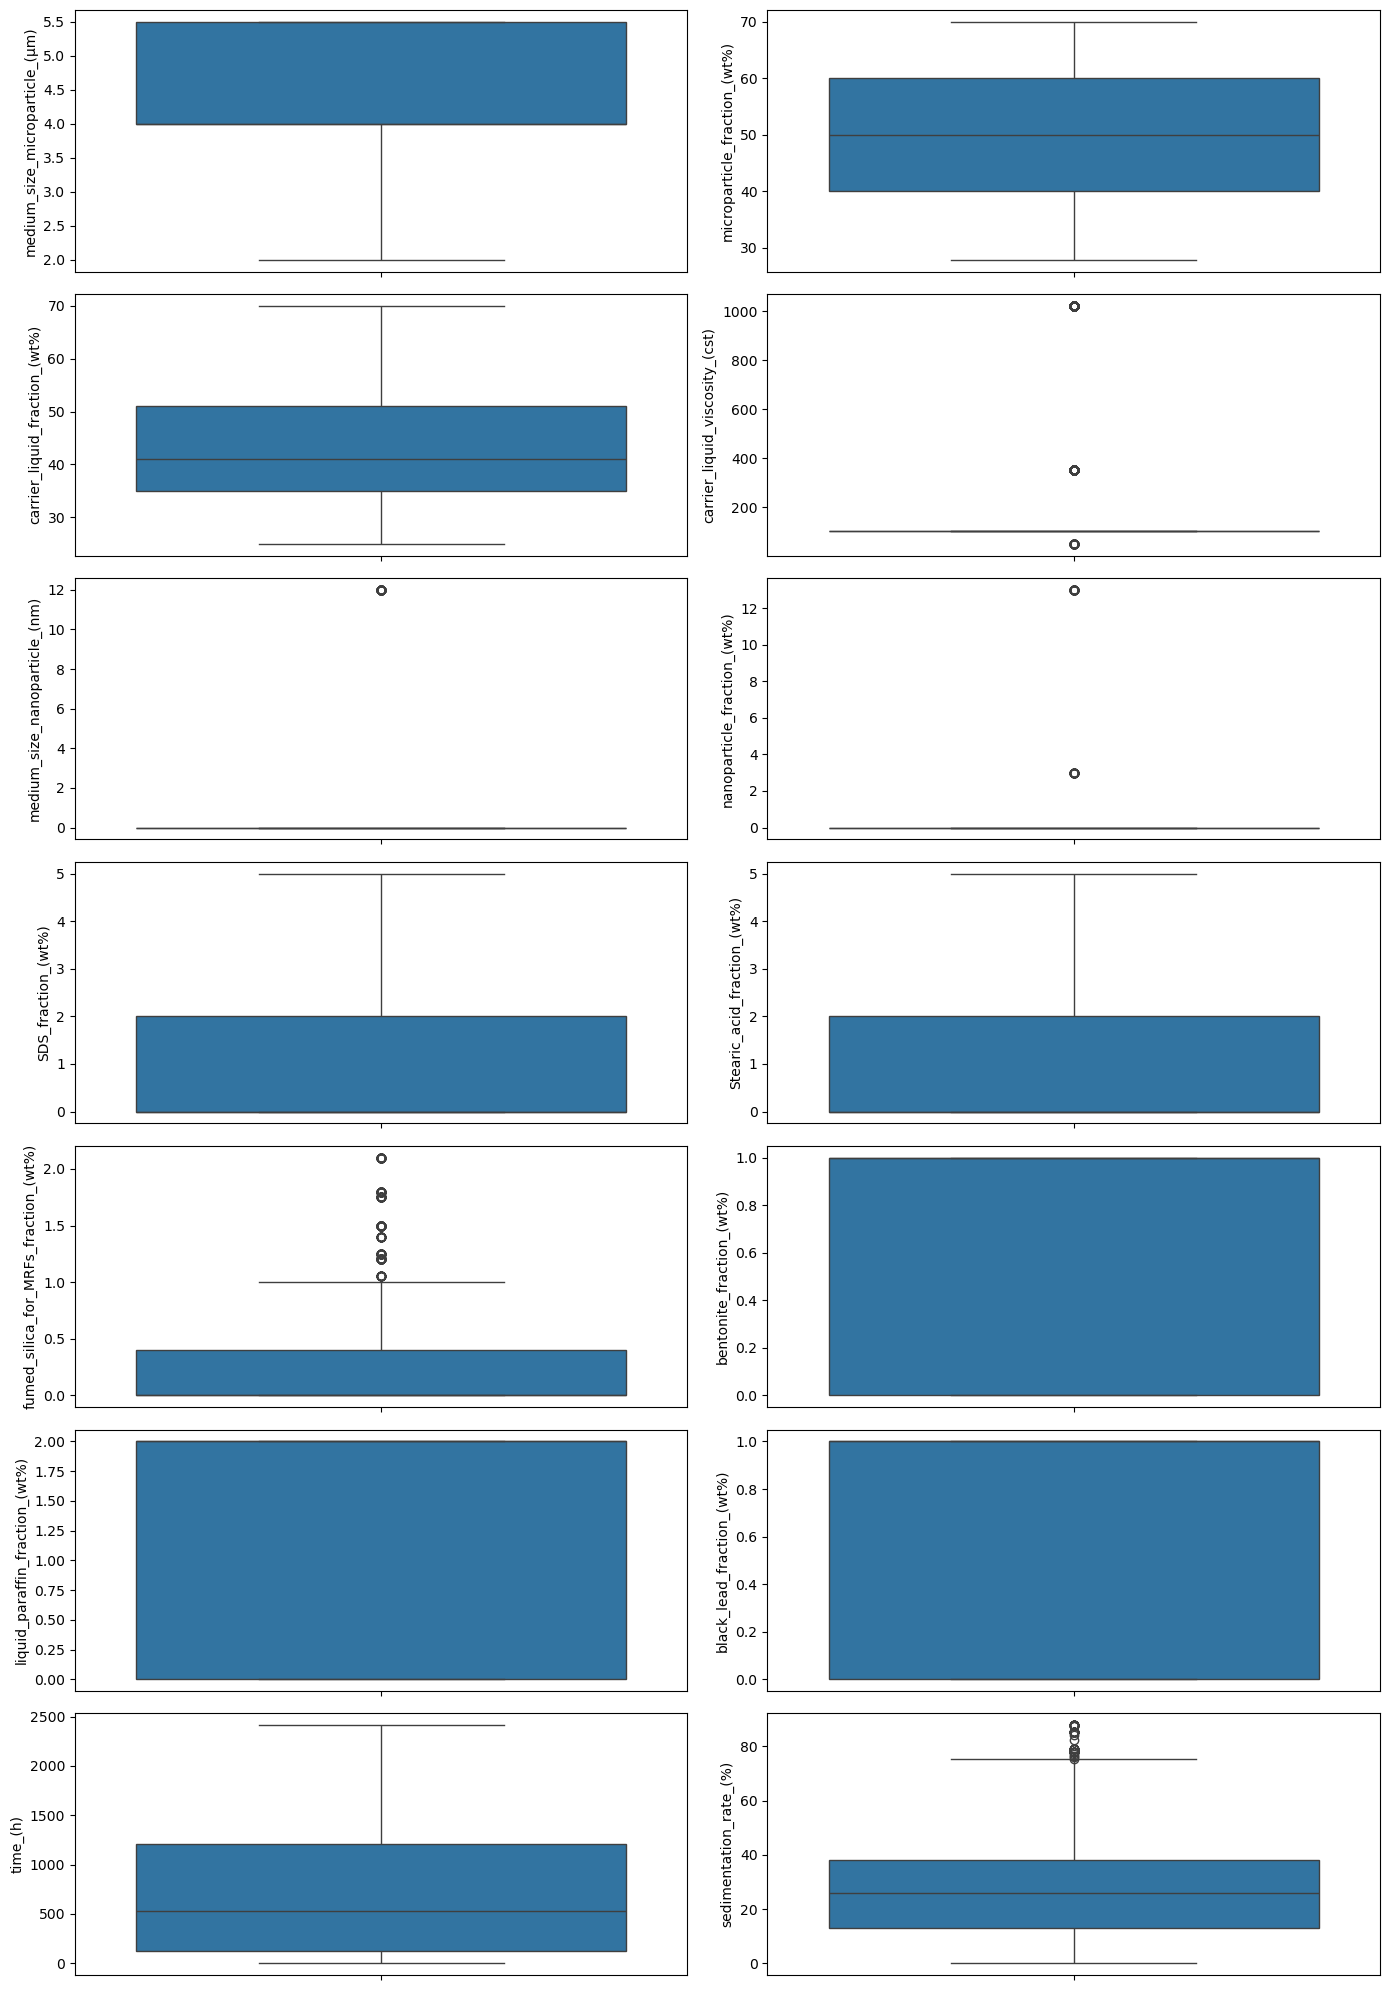

In [56]:
# Visualizing possible outliers through graphs

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2)

row = 0
column = 0
for i in numeric_variables:
    sns.boxplot(data = df_clean, y=i, ax=axes[row][column])
    column += 1
    if column == 2:
        row += 1
        column = 0            
plt.savefig('grafico.png', dpi=300)
plt.show()

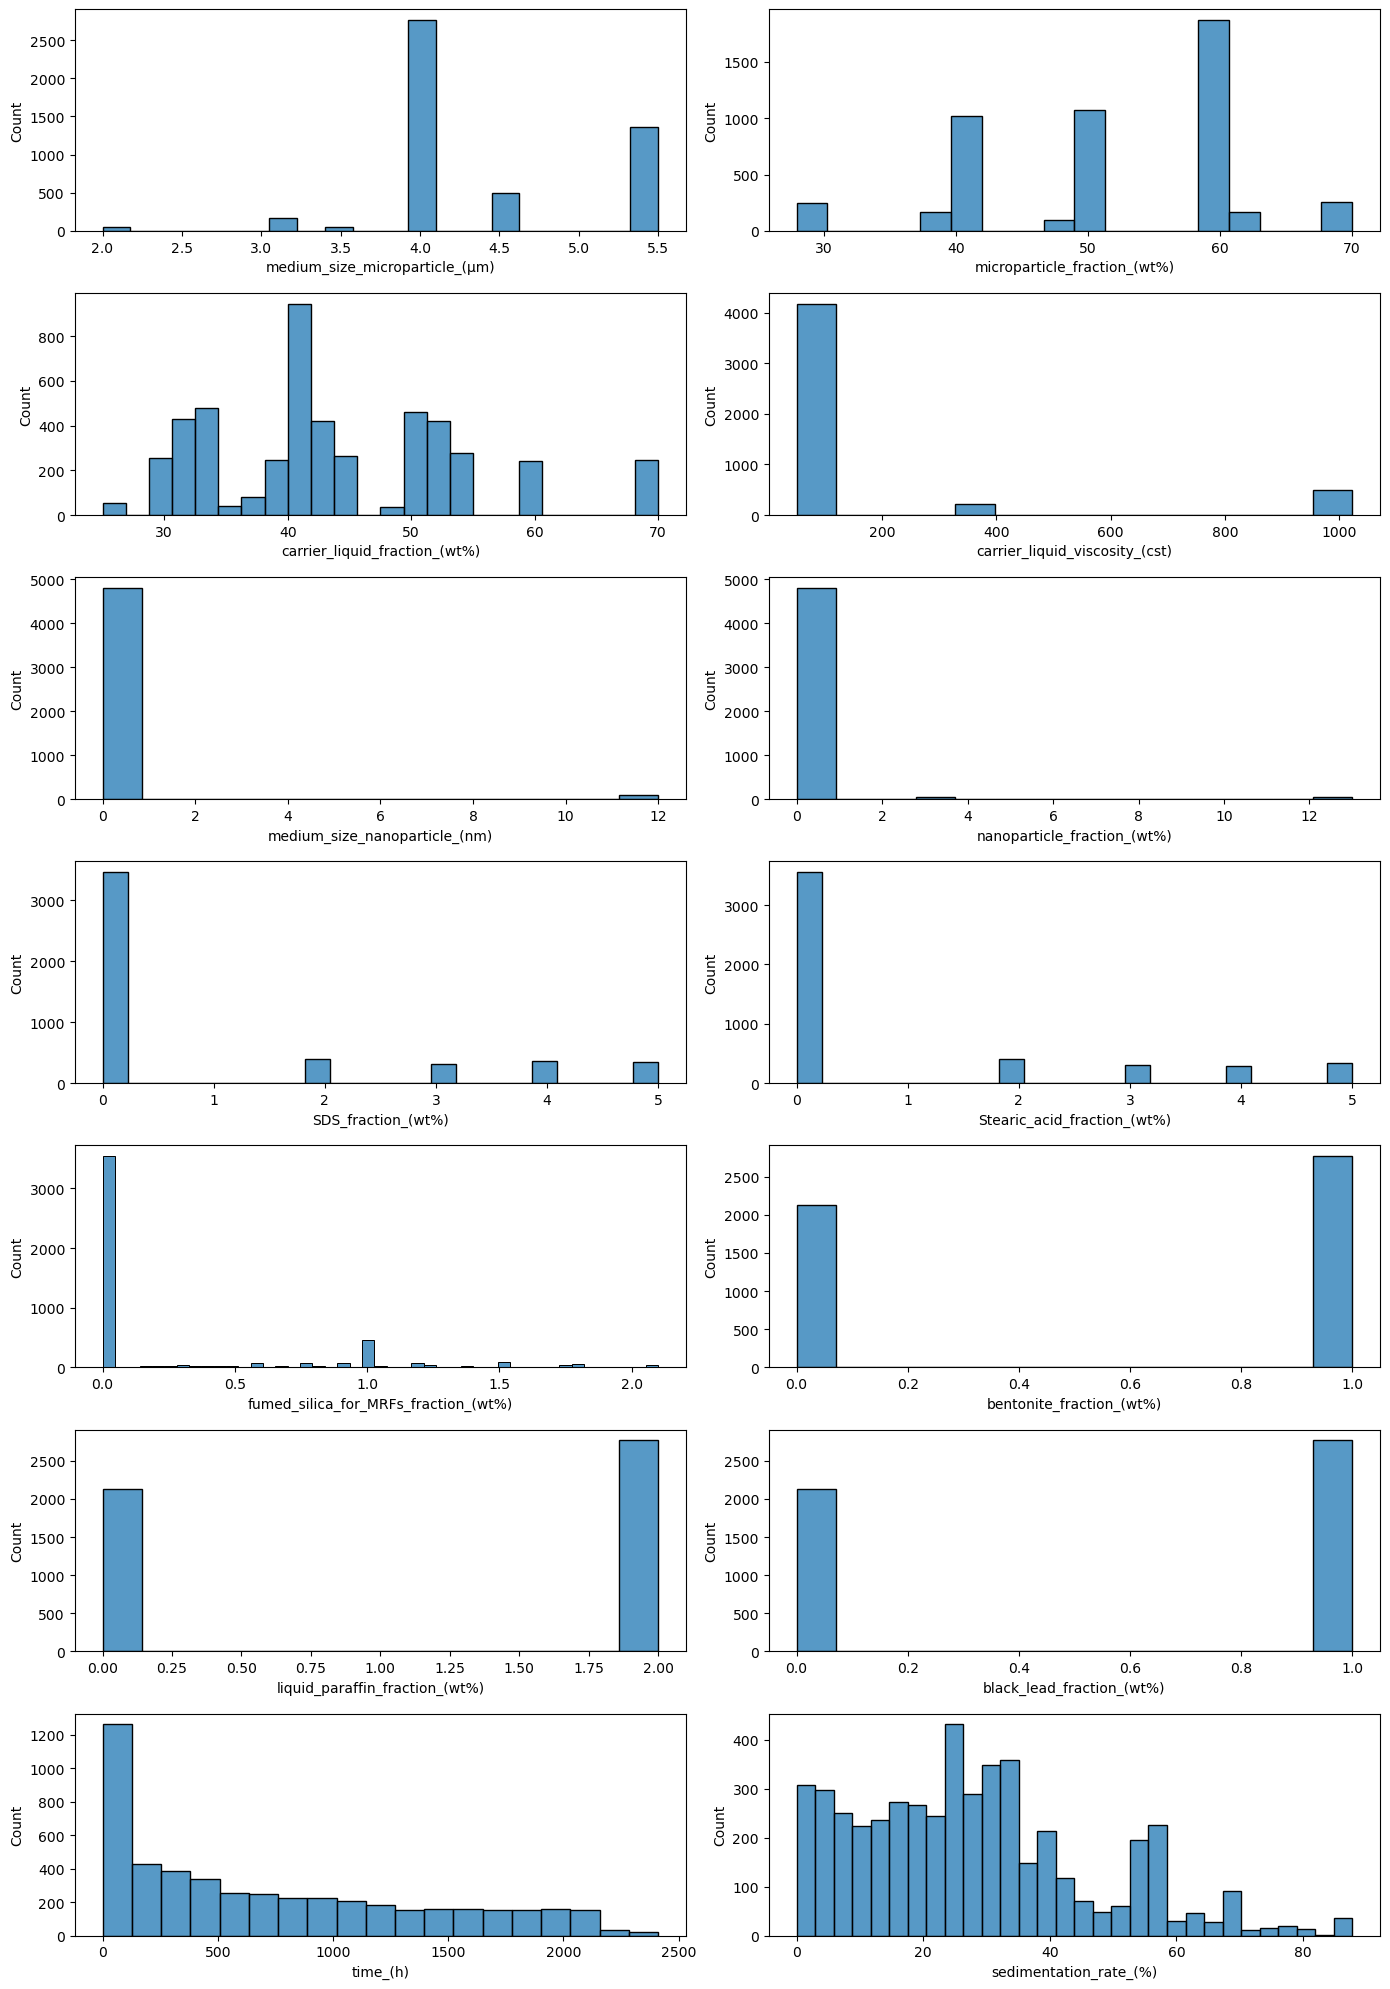

In [57]:
# Analyze data distribution

plt.rcParams["figure.figsize"] = [14.00, 20.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(7, 2)

row = 0
column = 0
for i in numeric_variables:
    sns.histplot(data = df_clean, x=i, ax=axes[row][column])
    column += 1
    if column == 2:
        row += 1
        column = 0            

plt.show()

In [58]:
#Separating predictor and target variables

X = df_clean[ df_clean.columns[:-1]]
y = df_clean[ df_clean.columns[-1:]]

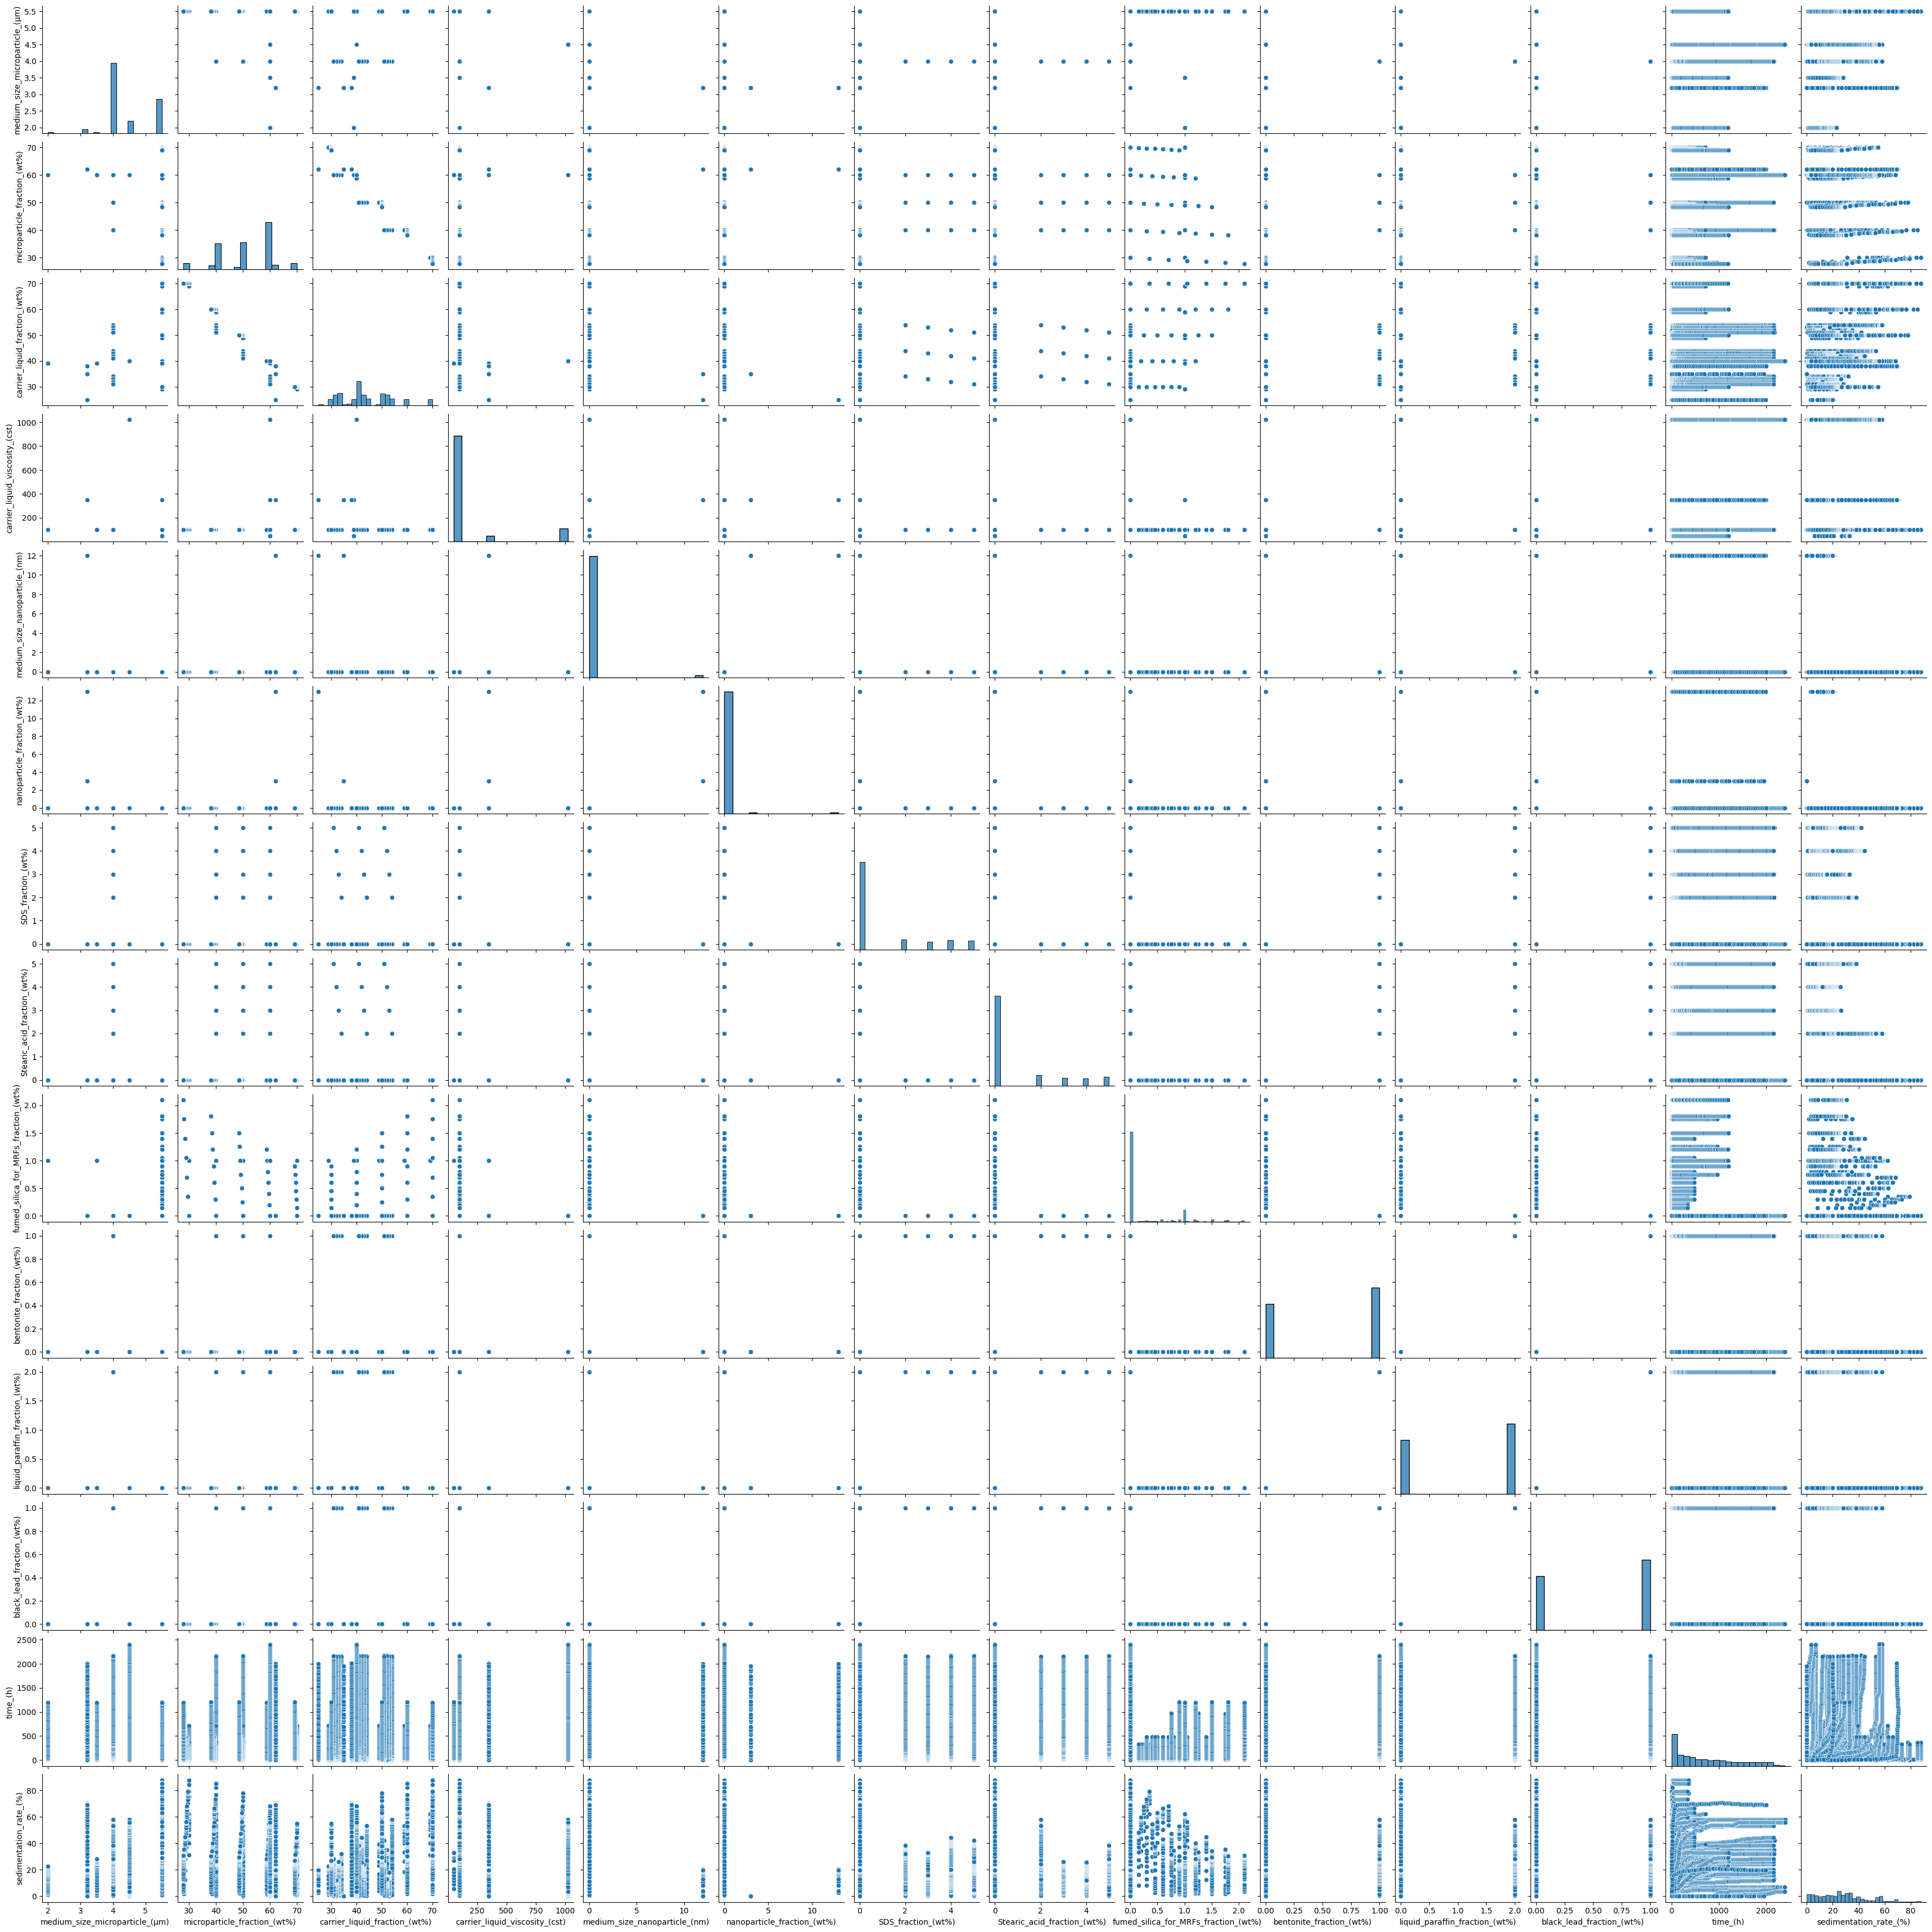

In [59]:
sns.pairplot(df_clean[['medium_size_microparticle_(μm)', 'microparticle_fraction_(wt%)', 'carrier_liquid_fraction_(wt%)', 'carrier_liquid_viscosity_(cst)', 'medium_size_nanoparticle_(nm)', 'nanoparticle_fraction_(wt%)',  'SDS_fraction_(wt%)', 'Stearic_acid_fraction_(wt%)', 'fumed_silica_for_MRFs_fraction_(wt%)', 'bentonite_fraction_(wt%)', 'liquid_paraffin_fraction_(wt%)', 'black_lead_fraction_(wt%)', 'time_(h)', 'sedimentation_rate_(%)']])

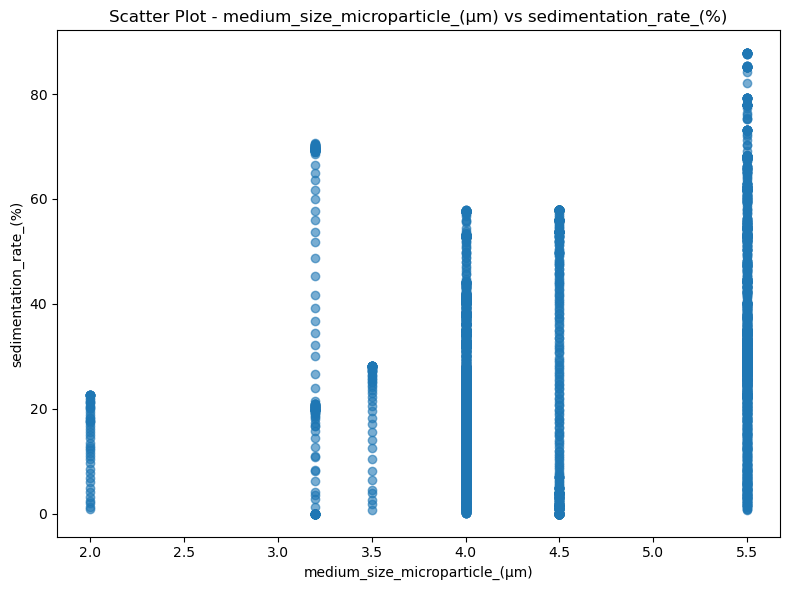

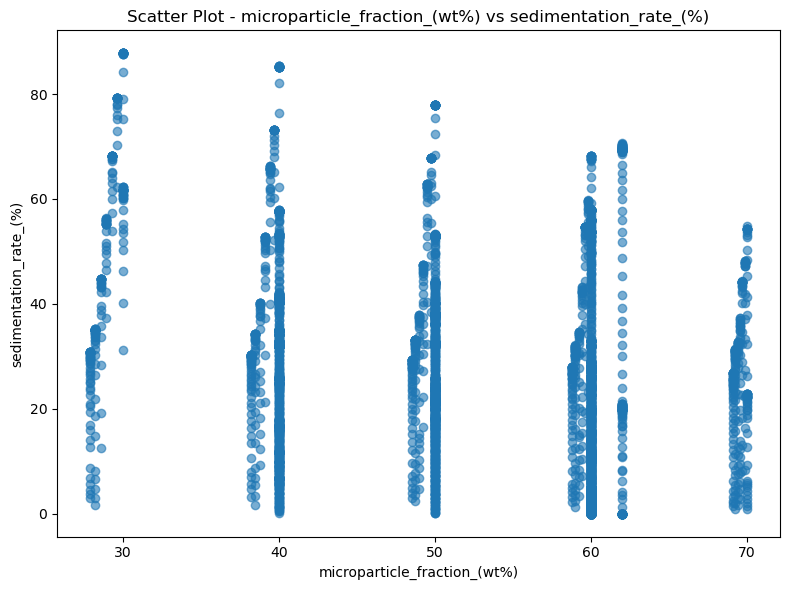

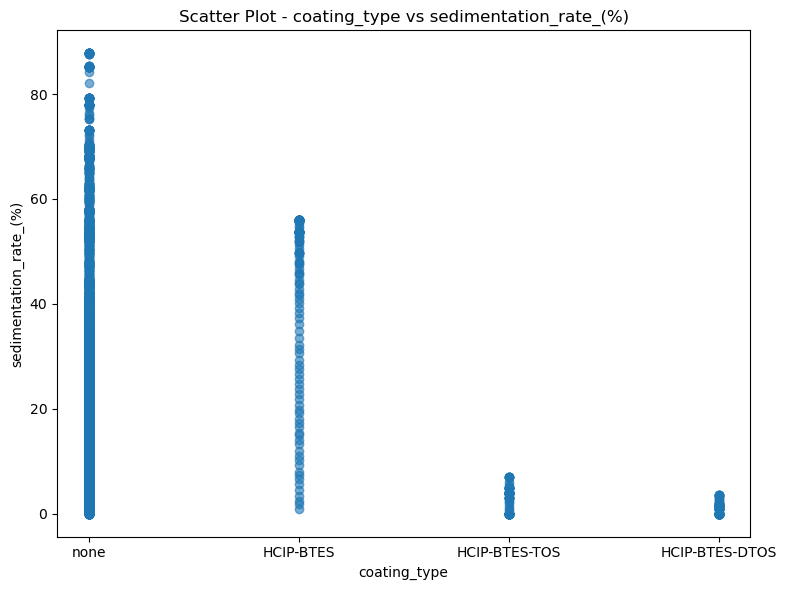

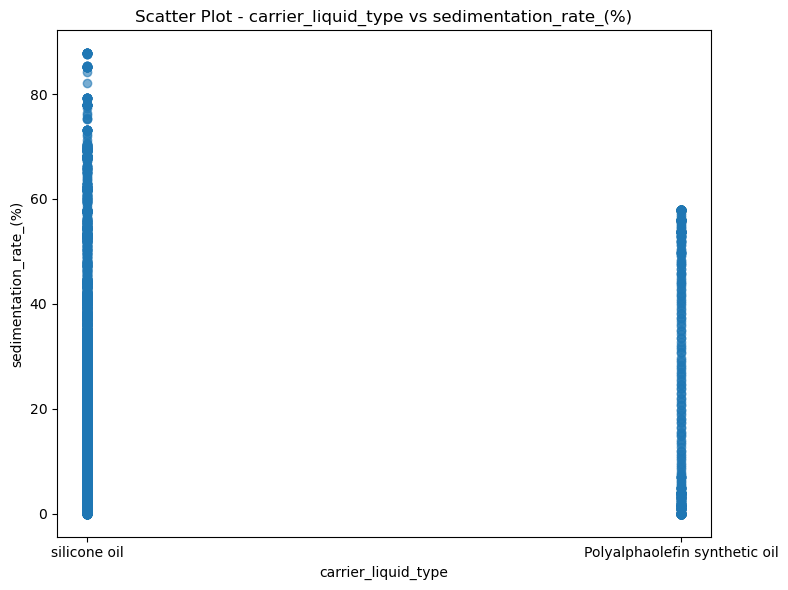

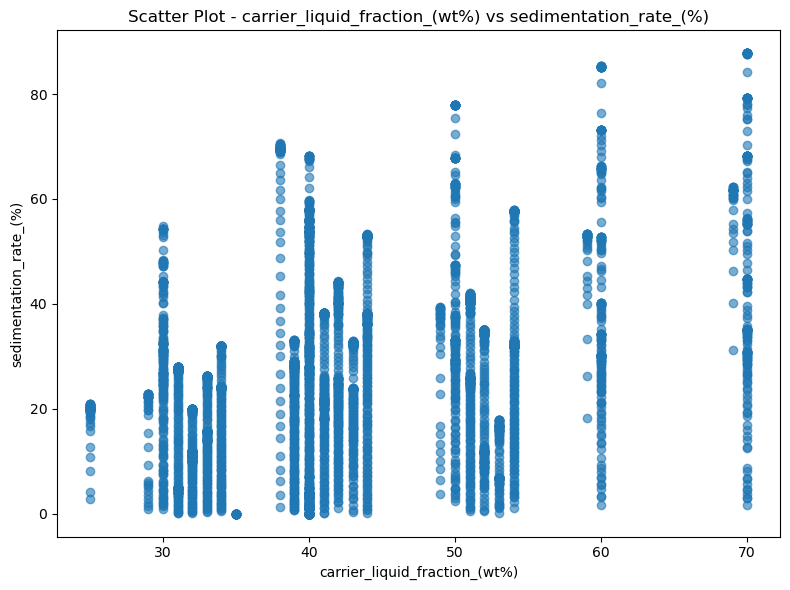

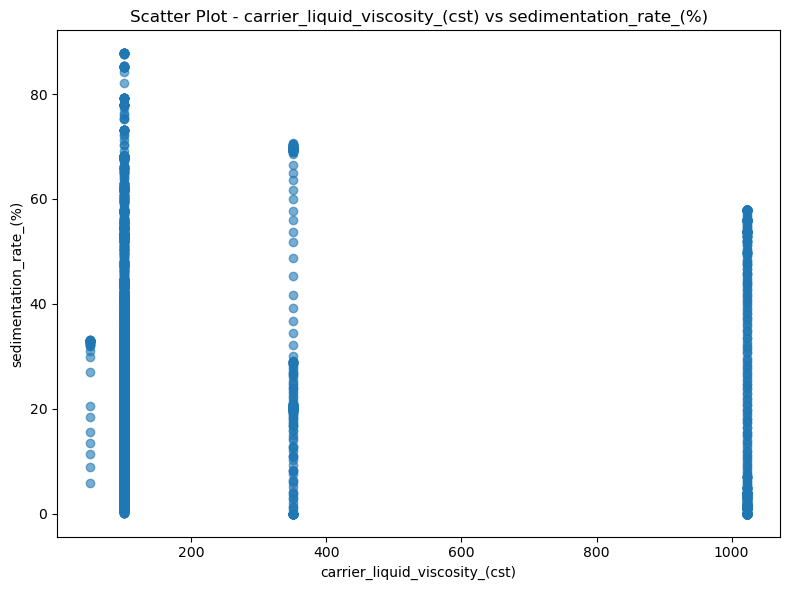

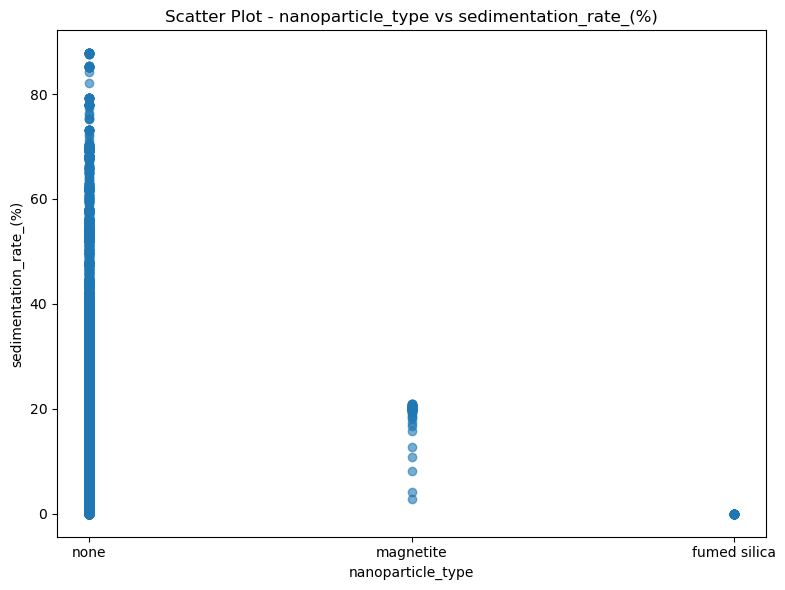

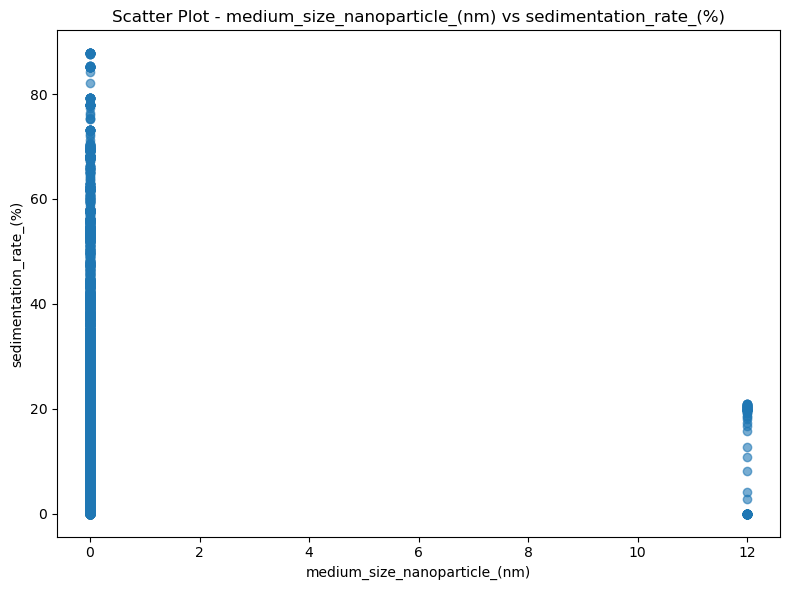

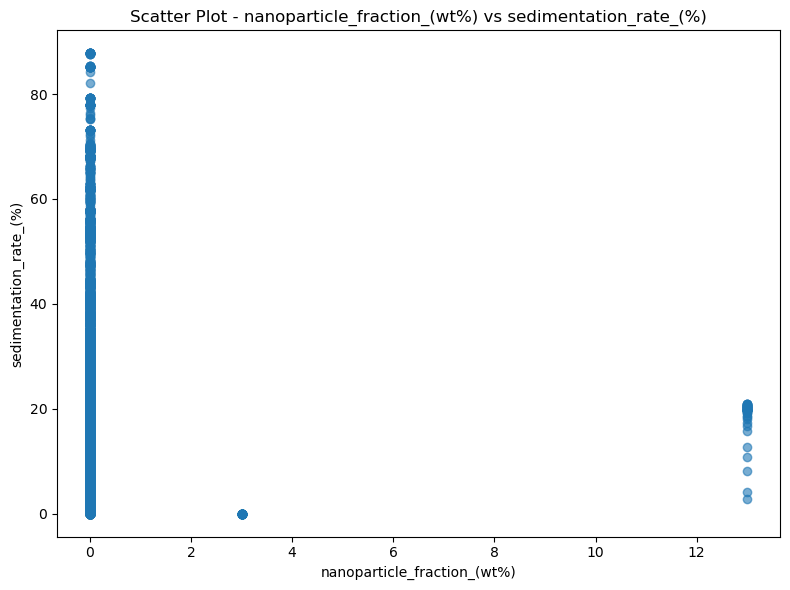

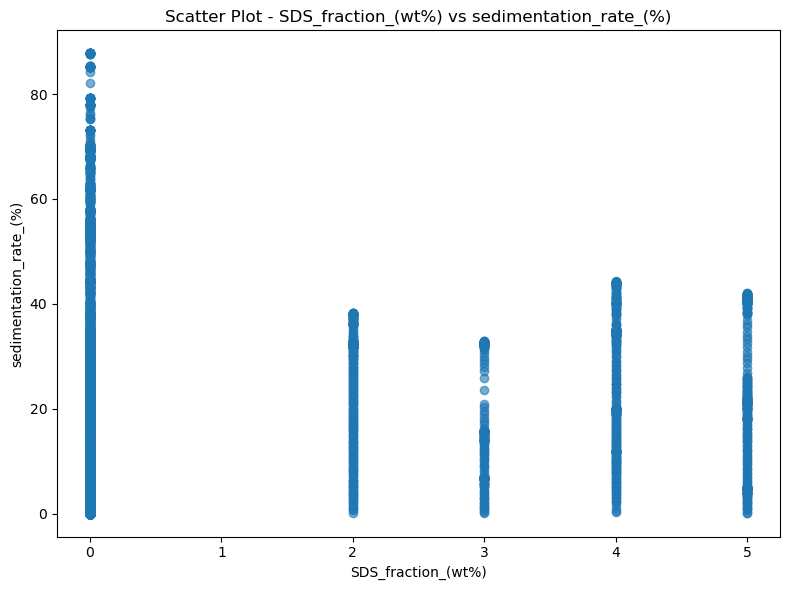

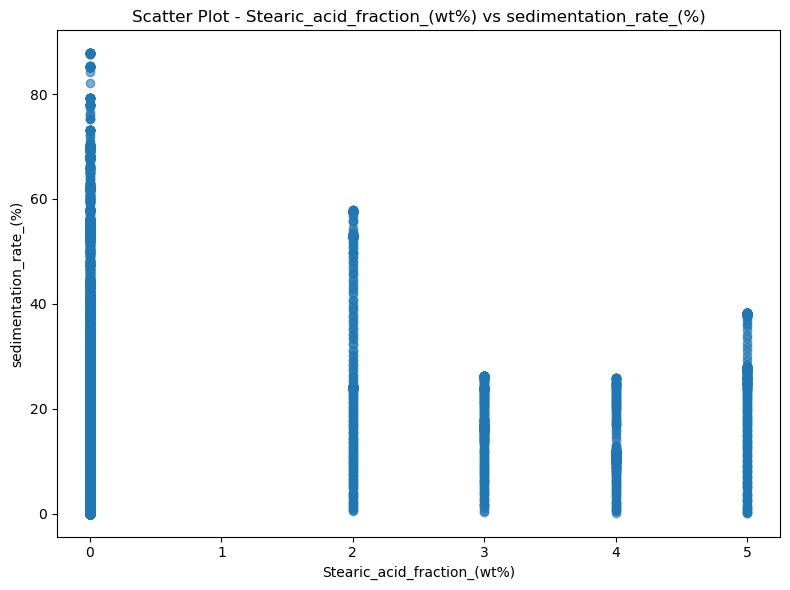

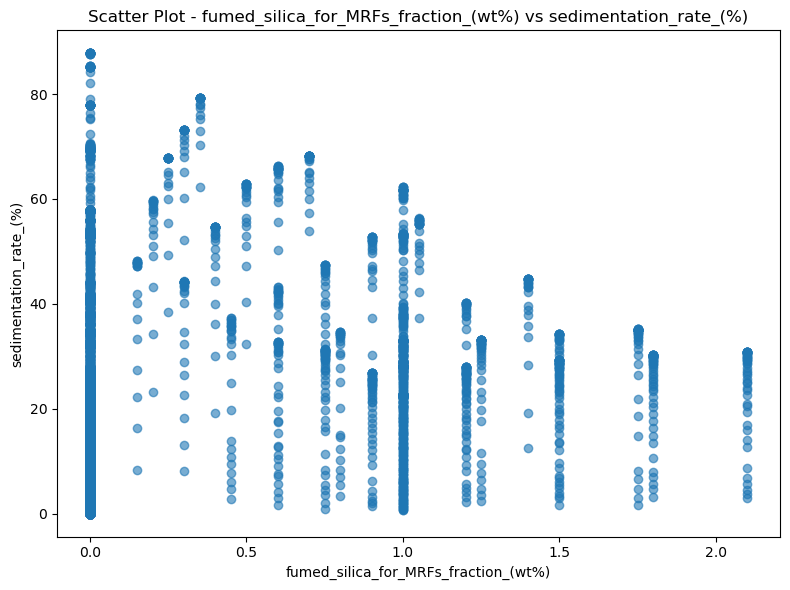

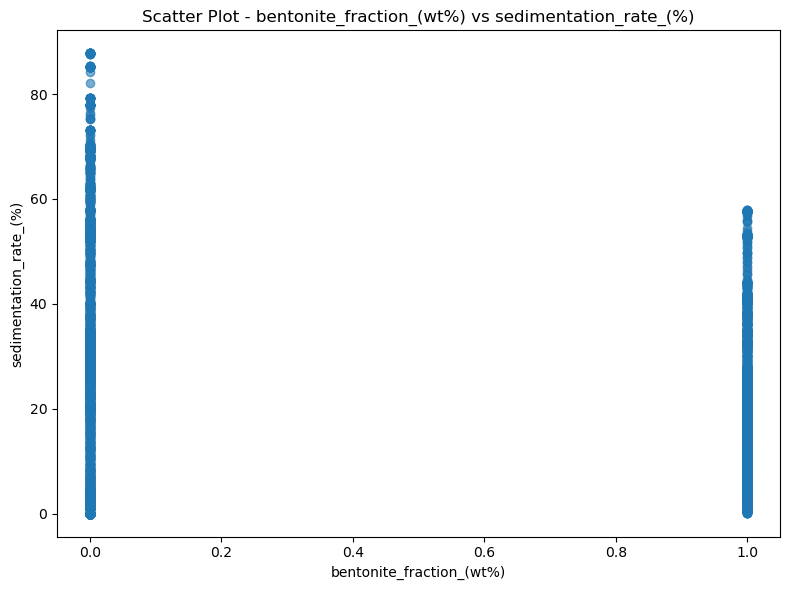

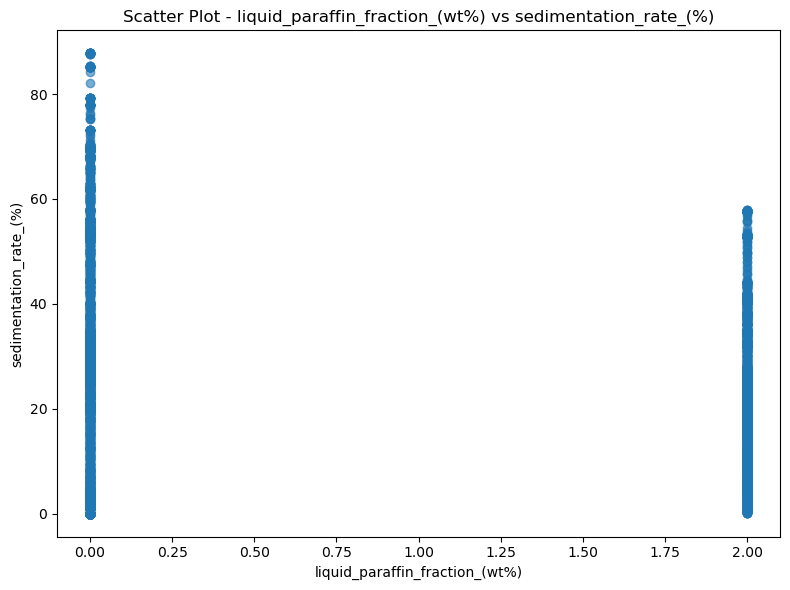

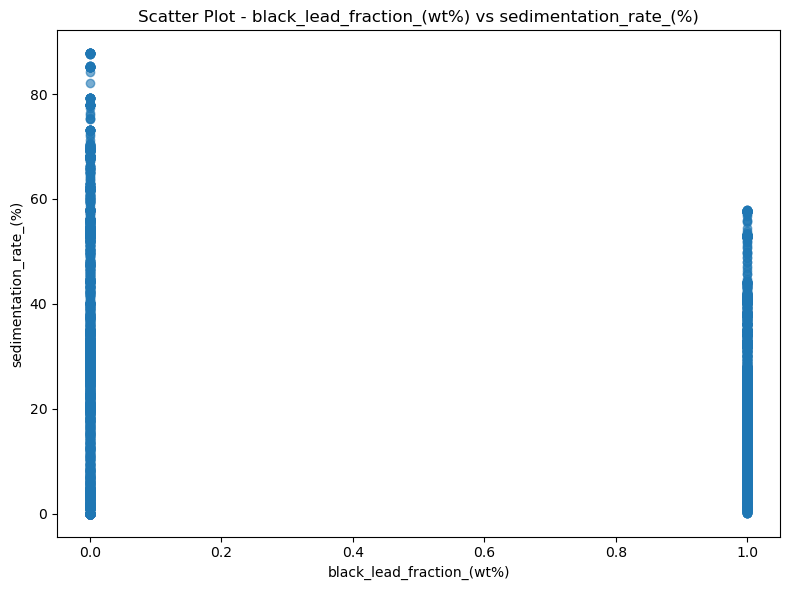

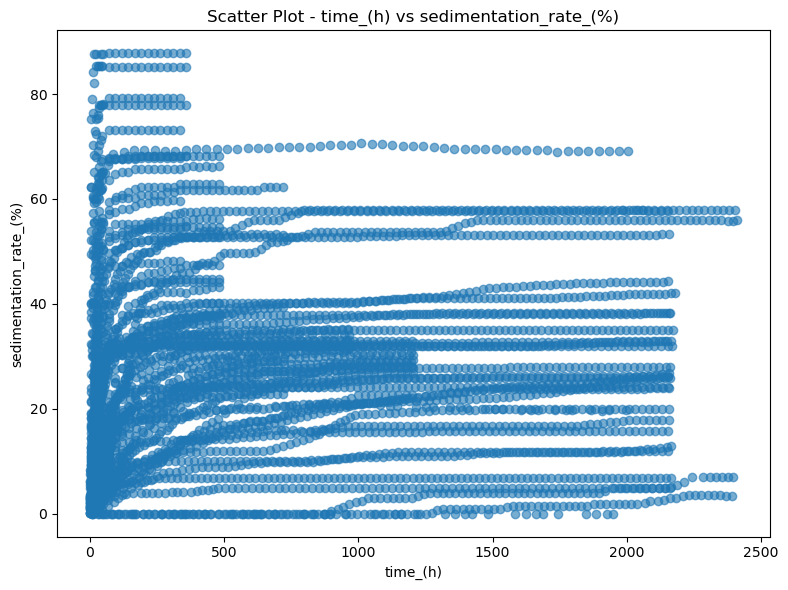

In [60]:
#Plotting scatterplots for all variables in X with respect to variable y
for col in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[col], y, alpha=0.6)
    plt.title(f'Scatter Plot - {col} vs sedimentation_rate_(%)')
    plt.xlabel(col)
    plt.ylabel('sedimentation_rate_(%)')
    plt.show()

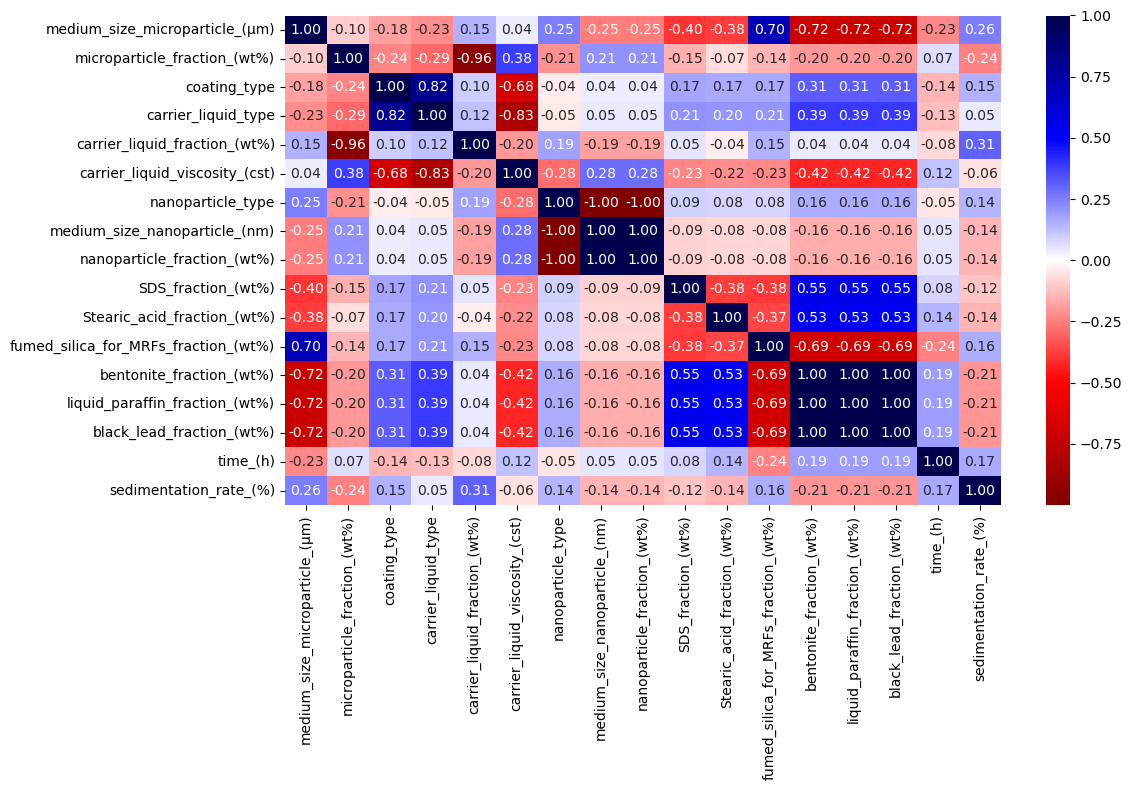

In [87]:
#Correlation between variables (Spearman)
corr_spearman = df_clean.corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(corr_spearman, annot=True, cmap='seismic_r', fmt='.2f')
plt.savefig('grafico.png', dpi=300)
plt.show()

In [61]:
df_clean['sedimentation_rate_(%)'] = df_clean['sedimentation_rate_(%)']/100

In [62]:
# Treating string data, create the encoder.

lb = LabelEncoder()

for var in ['coating_type','carrier_liquid_type','nanoparticle_type']:
    df_clean[var] = lb.fit_transform(df_clean[var])

In [63]:
df_clean.head()

,medium_size_microparticle_(μm),microparticle_fraction_(wt%),coating_type,carrier_liquid_type,carrier_liquid_fraction_(wt%),carrier_liquid_viscosity_(cst),nanoparticle_type,medium_size_nanoparticle_(nm),nanoparticle_fraction_(wt%),SDS_fraction_(wt%),Stearic_acid_fraction_(wt%),fumed_silica_for_MRFs_fraction_(wt%),bentonite_fraction_(wt%),liquid_paraffin_fraction_(wt%),black_lead_fraction_(wt%),time_(h),sedimentation_rate_(%)
0,4.00,40.00,3,1,54,100,2,0,0,2,0,0.00,1,2,1,1.49,0.08
1,4.00,40.00,3,1,54,100,2,0,0,2,0,0.00,1,2,1,2.52,0.08
2,4.00,40.00,3,1,54,100,2,0,0,2,0,0.00,1,2,1,3.45,0.03
3,4.00,40.00,3,1,54,100,2,0,0,2,0,0.00,1,2,1,3.66,0.04
4,4.00,40.00,3,1,54,100,2,0,0,2,0,0.00,1,2,1,3.89,0.04


In [168]:
#Scale the data
stdScaler = StandardScaler()
 
# z = (x - u) /s
X1 = stdScaler.fit_transform(X) 

In [169]:
#Splitting into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 42)

In [170]:
#Converting 'y' to one-dimensional (1D) vector to avoid warnings
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [171]:
#Linear Regression (LR) model
regressor_LR = LinearRegression()

In [172]:
#Training the model
regressor_LR = regressor_LR.fit(X_train, y_train)

In [173]:
#Calculating predictions for the training and testing set
y_train_pred_LR = regressor_LR.predict(X_train)
y_test_pred_LR = regressor_LR.predict(X_test)

In [174]:
# The coefficients
print("Coefficients: \n", regressor_LR.coef_)

Coefficients: 
 [ 2.43174715e-02 -2.40808468e+12  7.96417011e-03  8.35017396e-02
 -2.39558630e+12 -1.89222426e-02  1.20750613e+12  1.83512738e+12
 -1.11685232e+12 -3.93743089e+11 -3.82671619e+11 -1.17325142e+11
 -1.53697370e+11 -1.53697370e+11 -1.53697370e+11  5.09890892e-02]


In [175]:
print("Intercept: ", regressor_LR.intercept_)

Intercept:  0.2816914420191252


In [176]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_LR):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_LR):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_LR):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_LR):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_LR):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_LR):.5f}")


R2 Train: 0.49273
R2 Test: 0.43847
RMSE Train: 0.13252
RMSE Test: 0.14199
MAE Train: 0.10093
MAE Test: 0.11008


In [177]:
#Function to show R2 on the graph
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['sedimentation_rate_(%)'], data['Predicted'])
    r = float(r) ** 2
    err = root_mean_squared_error(data['sedimentation_rate_(%)'], data['Predicted'])
    ax = plt.gca()

    ax.text(.05, .8, 'r2={:.5f}, p={:.5f}, RMSE={:.5f}'.format(r, p, err),
            transform=ax.transAxes)

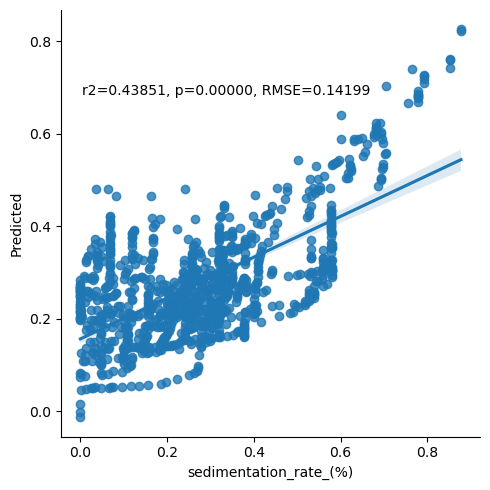

In [178]:
#Visualization Multiple Linear Regression
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_LR

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

In [179]:
#Multi-Layer Perceptron (MLP) model
regressor_MLP = MLPRegressor(solver='adam', hidden_layer_sizes=(16, 32, 32, 16), 
                           n_iter_no_change=100, random_state=42, max_iter=10000, 
                           learning_rate_init=0.0001, verbose=True)


Iteration 1, loss = 0.12552634
Iteration 2, loss = 0.08954744
Iteration 3, loss = 0.06419071
Iteration 4, loss = 0.04840935
Iteration 5, loss = 0.03780073
Iteration 6, loss = 0.03108066
Iteration 7, loss = 0.02659168
Iteration 8, loss = 0.02357757
Iteration 9, loss = 0.02134834
Iteration 10, loss = 0.01952747
Iteration 11, loss = 0.01808488
Iteration 12, loss = 0.01691332
Iteration 13, loss = 0.01586081
Iteration 14, loss = 0.01498544
Iteration 15, loss = 0.01418570
Iteration 16, loss = 0.01350083
Iteration 17, loss = 0.01289545
Iteration 18, loss = 0.01235407
Iteration 19, loss = 0.01186892
Iteration 20, loss = 0.01142613
Iteration 21, loss = 0.01101502
Iteration 22, loss = 0.01065623
Iteration 23, loss = 0.01033693
Iteration 24, loss = 0.01003641
Iteration 25, loss = 0.00975448
Iteration 26, loss = 0.00949359
Iteration 27, loss = 0.00925877
Iteration 28, loss = 0.00904523
Iteration 29, loss = 0.00882621
Iteration 30, loss = 0.00862796
Iteration 31, loss = 0.00842992
Iteration 32, los

<Axes: >

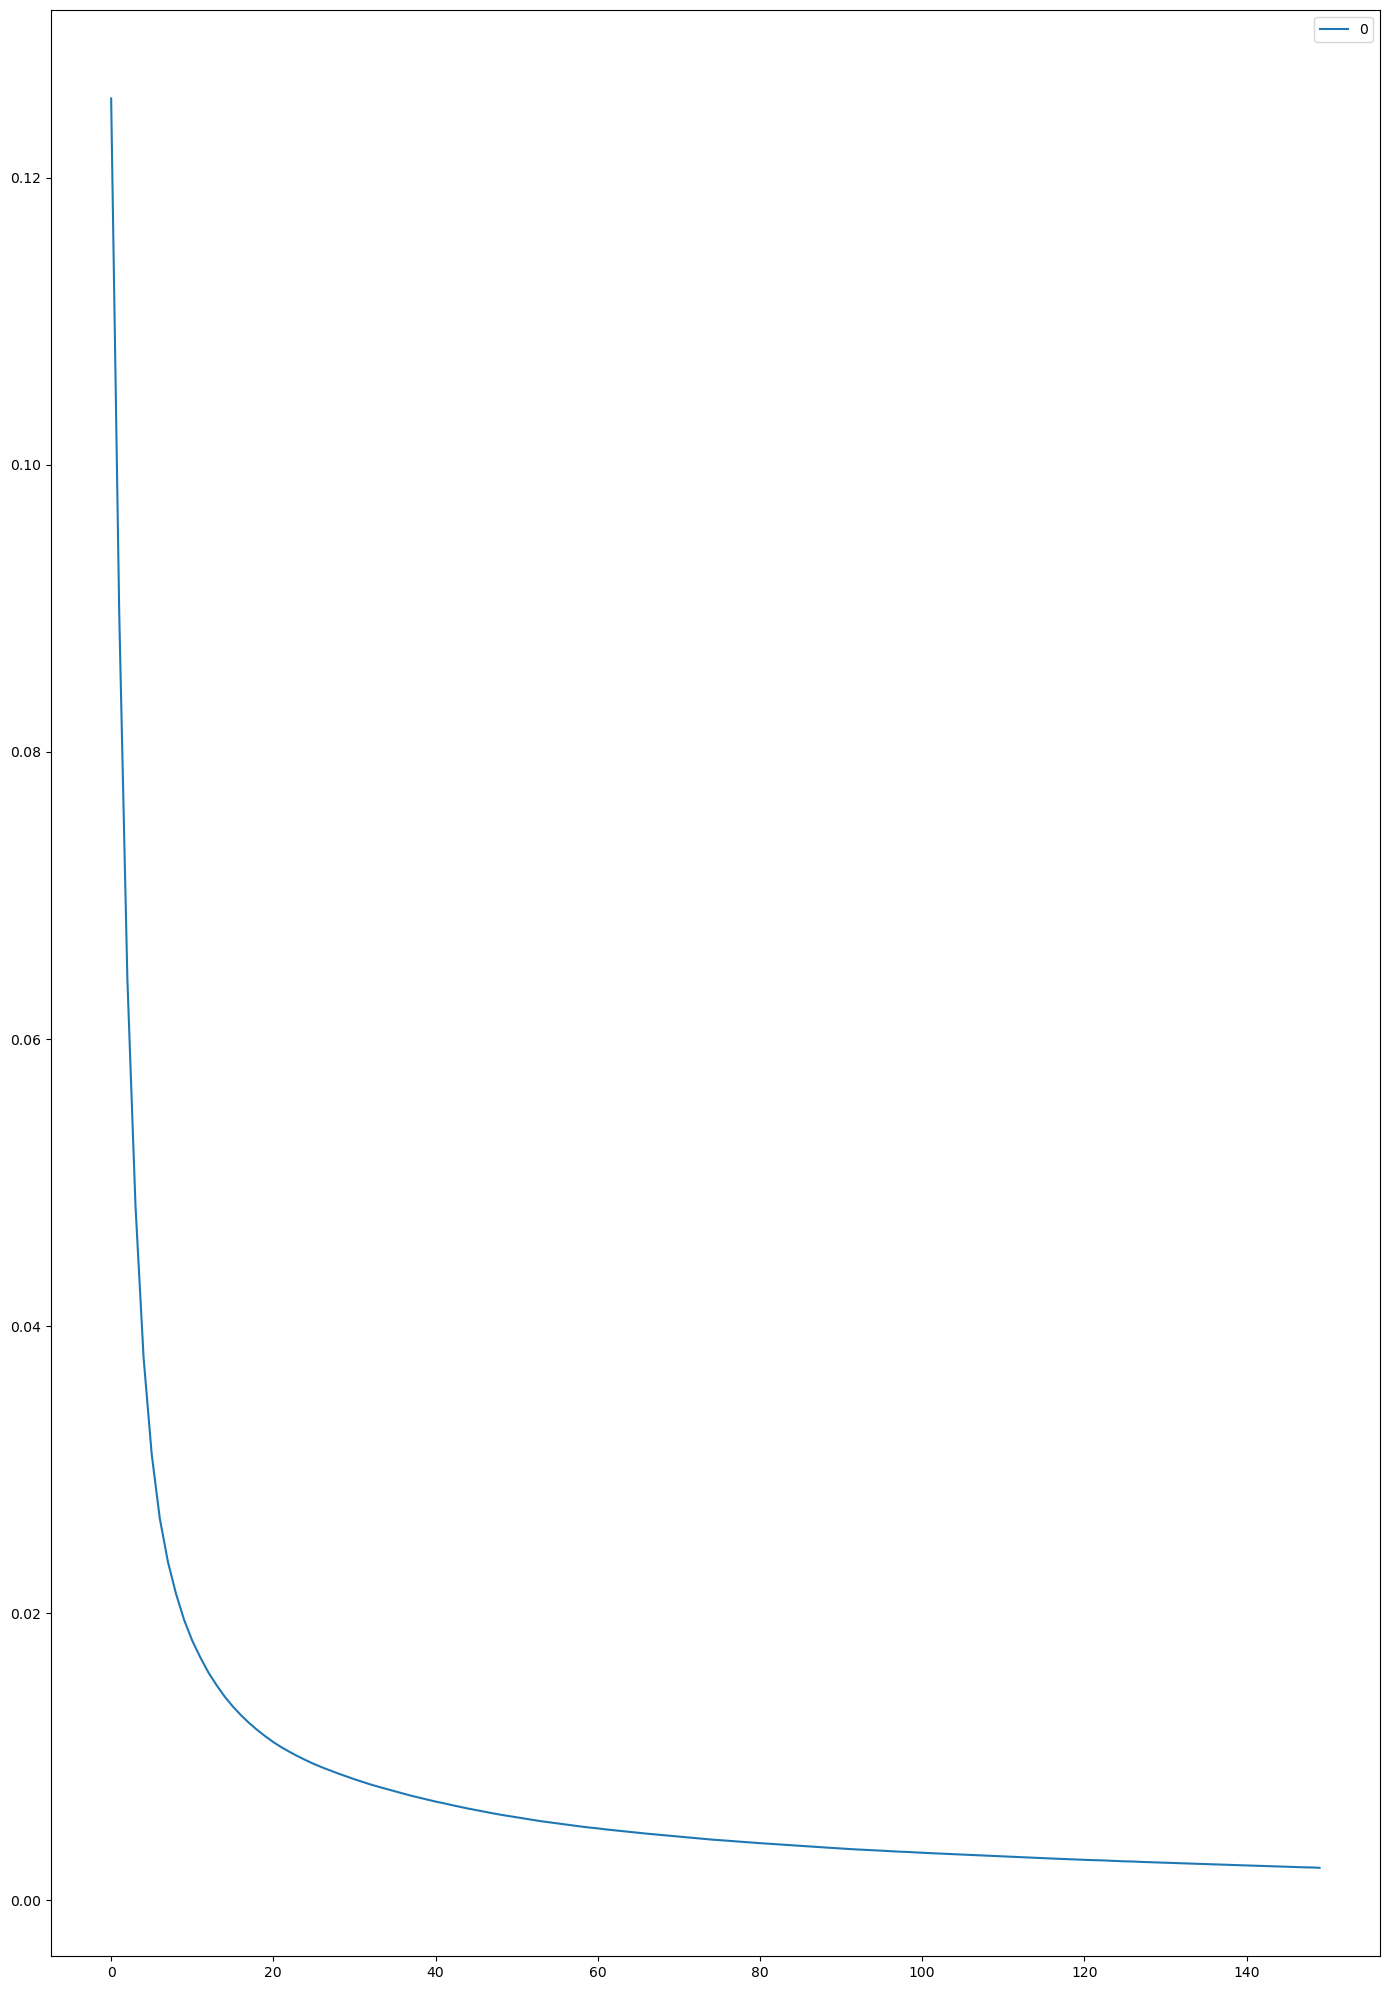

In [180]:
#Training the model
regressor_MLP.fit(X_train, y_train)

#Plotting the loss curve
pd.DataFrame(regressor_MLP.loss_curve_).plot()

In [181]:
#Calculating predictions for the training and testing set
y_train_pred_MLP = regressor_MLP.predict(X_train)
y_test_pred_MLP = regressor_MLP.predict(X_test)

In [182]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_MLP):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_MLP):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_MLP):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_MLP):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_MLP):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_MLP):.5f}")

R2 Train: 0.87152
R2 Test: 0.84145
RMSE Train: 0.06669
RMSE Test: 0.07545
MAE Train: 0.04983
MAE Test: 0.05616


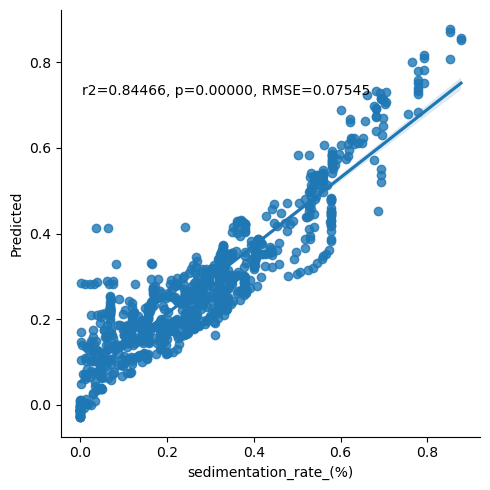

In [183]:
#Visualization Multi-Layer Perceptron
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_MLP

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

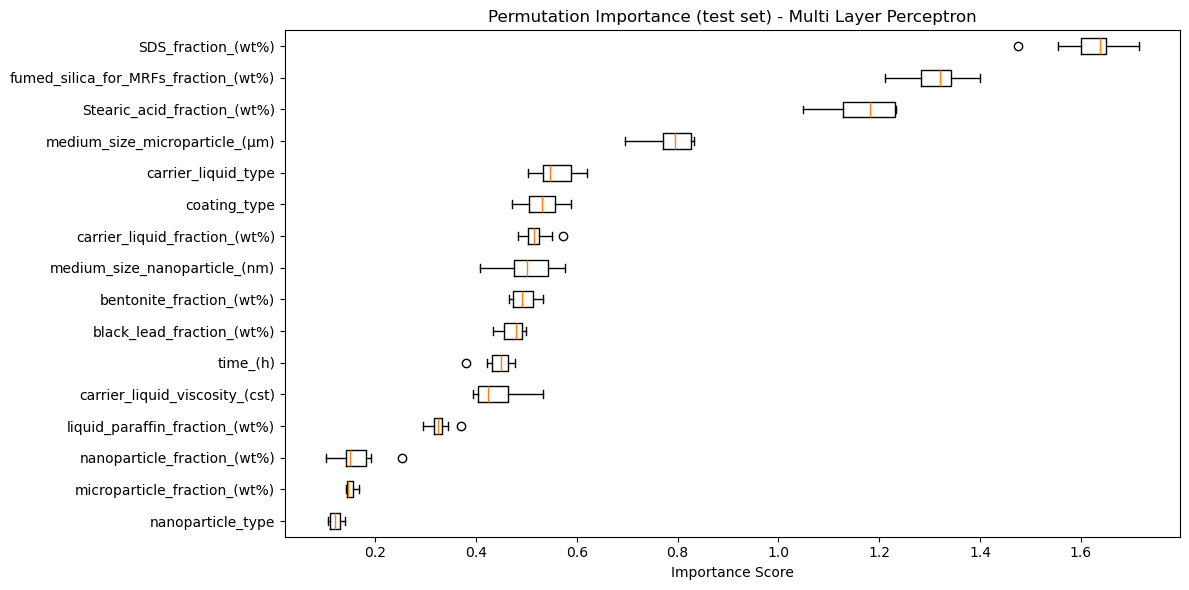

In [184]:
#Permutation in a Multi-Layer Perceptron model
#Calculation of the importance of variables by permutation
result = permutation_importance(
    regressor_MLP, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)

#Ordering the importance indices
sorted_idx_perm = result.importances_mean.argsort()

#Configuring the chart to display importance by permutation
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(
    result.importances[sorted_idx_perm].T,
    vert=False,
    labels=np.array(X.columns)[sorted_idx_perm]
)
ax.set_title("Permutation Importance (test set) - Multi Layer Perceptron")
ax.set_xlabel("Importance Score")

fig.tight_layout()
plt.show()

In [185]:
#Decision Tree (DT) Regressor model
regressor_DT = DecisionTreeRegressor(random_state=42)

In [186]:
#Training the modelo
regressor_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [187]:
#Calculating predictions for the training and testing set
y_train_pred_DT = regressor_DT.predict(X_train)
y_test_pred_DT = regressor_DT.predict(X_test)

In [188]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_DT):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_DT):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_DT):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_DT):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_DT):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_DT):.5f}")

R2 Train: 0.99980
R2 Test: 0.99321
RMSE Train: 0.00264
RMSE Test: 0.01561
MAE Train: 0.00034
MAE Test: 0.00606


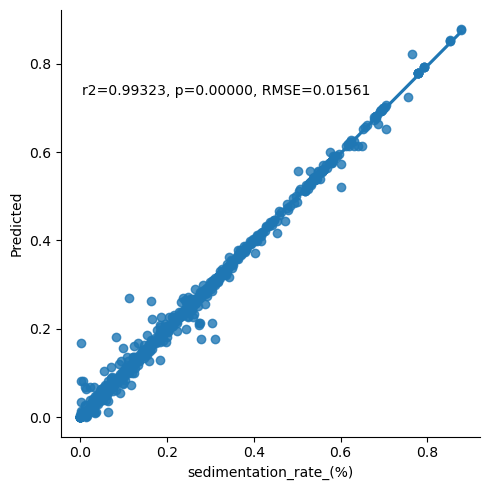

In [231]:
#Visualization Decision Tree
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_DT

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[5.62812558e-03 1.13658506e-01 1.28568651e-01 3.50551119e-02
 3.26508715e-01 2.88294273e-03 9.70528289e-03 0.00000000e+00
 7.37303506e-04 7.03629653e-02 1.95170153e-02 1.24701074e-01
 7.09675133e-06 1.39214451e-02 1.04979136e-06 1.48744715e-01]


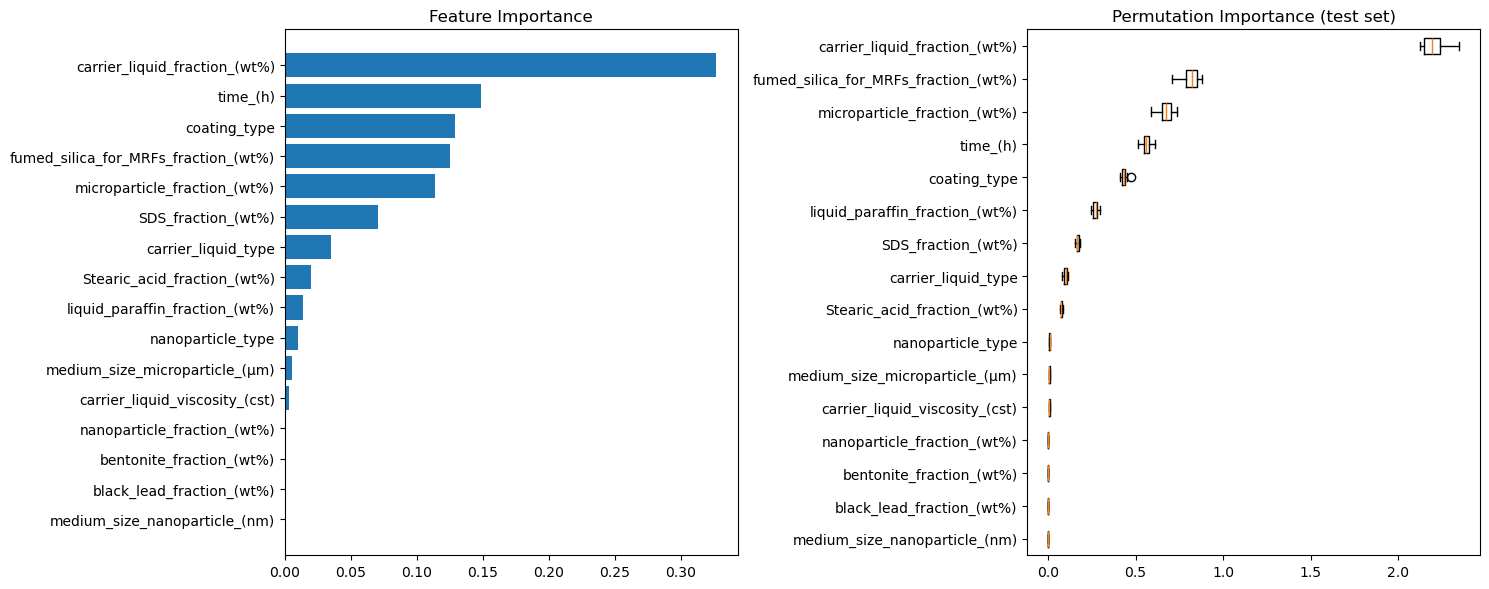

In [245]:
#Feature importance in a Decision Tree model
feature_importance = regressor_DT.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_DT, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [234]:
#Random Forest (RF) Regressor model
regressor_RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [237]:
#Training the model
regressor_RF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [238]:
#Calculating predictions for the training and testing set
y_train_pred_RF = regressor_RF.predict(X_train)
y_test_pred_RF = regressor_RF.predict(X_test)

In [239]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_RF):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_RF):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_RF):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_RF):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_RF):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_RF):.5f}")

R2 Train: 0.99912
R2 Test: 0.99651
RMSE Train: 0.00552
RMSE Test: 0.01119
MAE Train: 0.00202
MAE Test: 0.00472


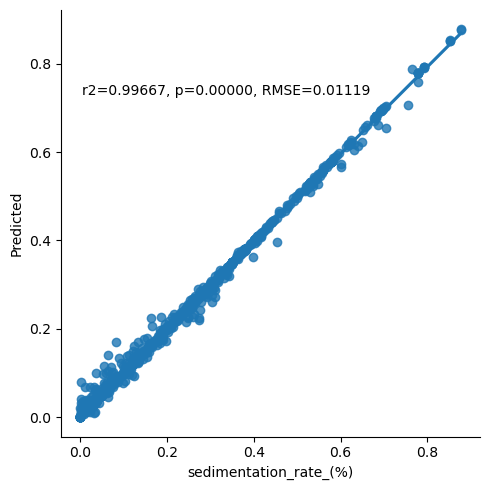

In [241]:
#Visualization Random Forest
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_RF

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[0.02615658 0.05936809 0.12443934 0.01608374 0.31111073 0.00646432
 0.00523676 0.00033906 0.00043595 0.08342593 0.05270151 0.15503324
 0.00258624 0.00261828 0.00287868 0.15112154]


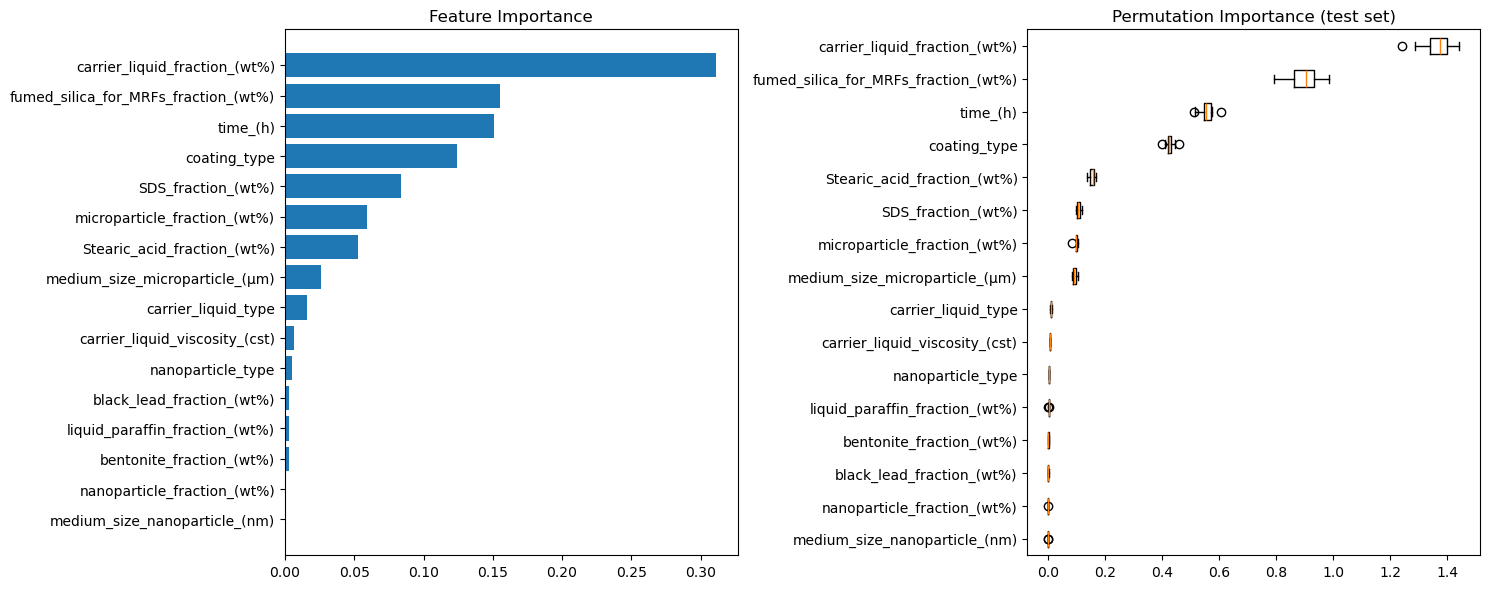

In [249]:
#Feature importance in a Random Forest model
feature_importance = regressor_RF.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_RF, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [250]:
#Gradient Boosting (GB) Regressor model
params_boosting = {
    "n_estimators": 1000,
    "max_depth": 10,
    "min_samples_split": 20,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [251]:
#Training the model
regressor_GB = GradientBoostingRegressor(**params_boosting)
regressor_GB.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10,
                          min_samples_split=20, n_estimators=1000)

In [252]:
#Calculating predictions for the training and testing set
y_train_pred_GB = regressor_GB.predict(X_train)
y_test_pred_GB = regressor_GB.predict(X_test)

In [253]:
#Calculating performance evaluation metrics
print(f"R2 Train: {r2_score(y_train, y_train_pred_GB):.5f}")
print(f"R2 Test: {r2_score(y_test, y_test_pred_GB):.5f}")
print(f"RMSE Train: {root_mean_squared_error(y_train, y_train_pred_GB):.5f}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred_GB):.5f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_train_pred_GB):.5f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_test_pred_GB):.5f}")

R2 Train: 0.99957
R2 Test: 0.99710
RMSE Train: 0.00387
RMSE Test: 0.01021
MAE Train: 0.00186
MAE Test: 0.00502


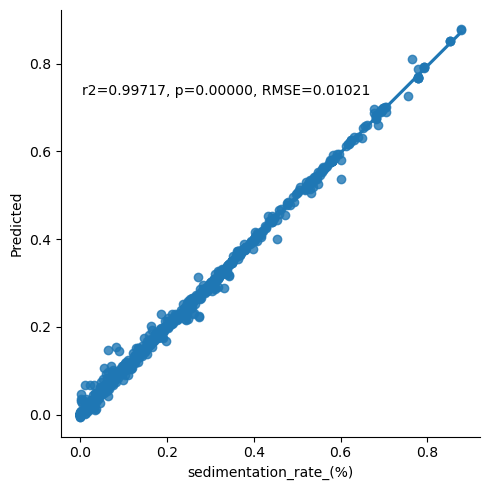

In [254]:
#Visualization Gradient Boosting
df = pd.DataFrame()
df['sedimentation_rate_(%)'] = y_test
df['Predicted'] = y_test_pred_GB

g = sns.lmplot(x = 'sedimentation_rate_(%)', y = 'Predicted', data = df, ci = 90)
g.map_dataframe(annotate)
plt.show()

[1.24818286e-02 7.30451569e-02 1.30479625e-01 1.40210768e-02
 3.50465136e-01 1.81721239e-02 5.70102033e-03 2.91030171e-04
 2.48526355e-04 8.44773969e-02 2.79851036e-02 1.31506840e-01
 4.26520696e-03 2.53670370e-03 3.65655864e-03 1.40666666e-01]


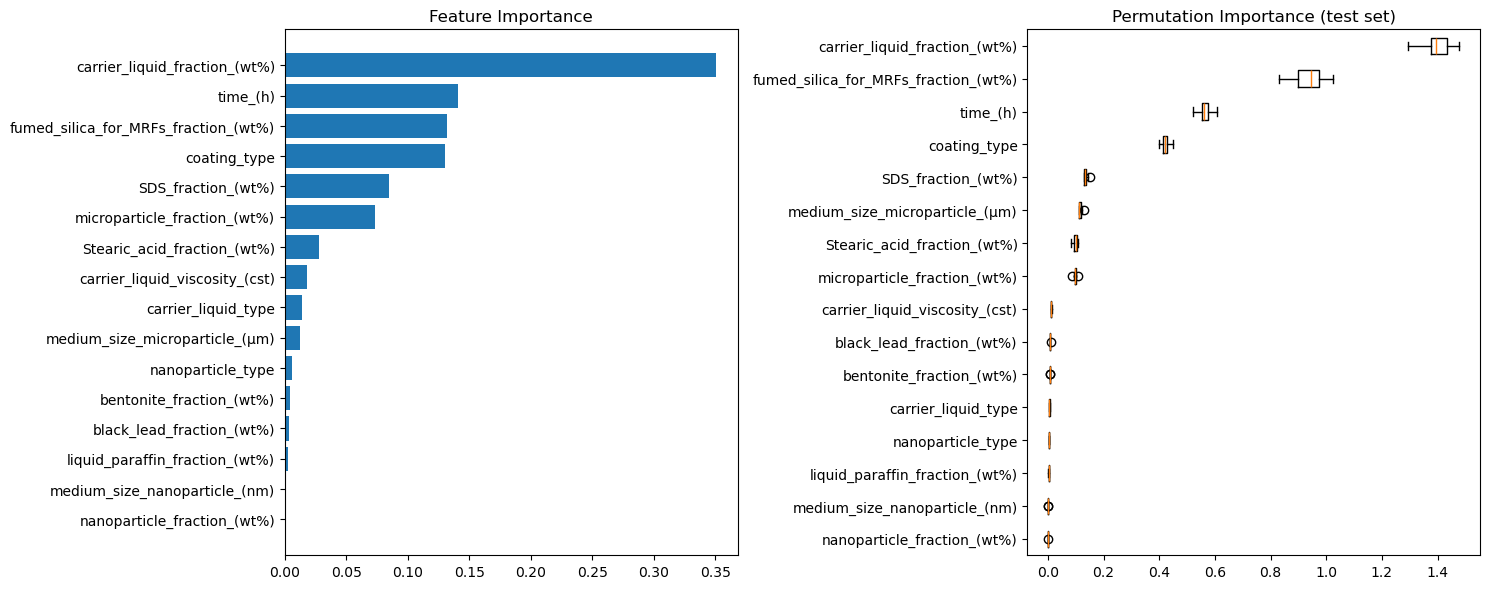

In [261]:
#Feature importance in a Gradient Boosting model
feature_importance = regressor_GB.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X.columns.values.tolist())[sorted_idx])
plt.title("Feature Importance")

result = permutation_importance(
    regressor_GB, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X.columns.values.tolist())[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()